** Lenet**

Mounted at /content/drive
WhatsApp Image 2025-05-29 at 10.50.00_64444240.jpg -> Red
emotion detection image1.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.46_0a5c68e1.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.46_dd0a518f.jpg -> Green
WhatsApp Image 2025-05-29 at 10.49.46_57886e87.jpg -> Blue
WhatsApp Image 2025-05-29 at 10.49.48_20f450d8.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.47_2917743b.jpg -> Blue
WhatsApp Image 2025-05-29 at 10.49.50_328645d3.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.48_785e3676.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.49_4852e48a.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.50_017e20f3.jpg -> Green
WhatsApp Image 2025-05-29 at 10.49.49_63400970.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.50_73a2f3cd.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.50_e65cf1d4.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.51_a7e6177e.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.53_1c7bc93c.jpg -> Red
WhatsApp Image 2025-05-29 at 10.49.52_98a95c7f.jpg -> Green
Wh

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 839ms/step - accuracy: 0.7041 - loss: 1.1197 - val_accuracy: 0.7105 - val_loss: 0.8235
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 788ms/step - accuracy: 0.7224 - loss: 0.7408 - val_accuracy: 0.8618 - val_loss: 0.3313
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - accuracy: 0.8595 - loss: 0.4391 - val_accuracy: 0.7368 - val_loss: 0.4838
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 774ms/step - accuracy: 0.8118 - loss: 0.4186 - val_accuracy: 0.8947 - val_loss: 0.2488
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 783ms/step - accuracy: 0.8978 - loss: 0.2905 - val_accuracy: 0.8289 - val_loss: 0.3889
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 915ms/step - accuracy: 0.8697 - loss: 0.3353 - val_accuracy: 0.8750 - val_loss: 0.2825
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 924ms/step - accuracy: 0.8963 - loss: 0.2493 - val_accuracy: 0.8947 - val_loss: 0.3459
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 823ms/step - accuracy: 0.9463 - loss: 0.1362 - val_accu

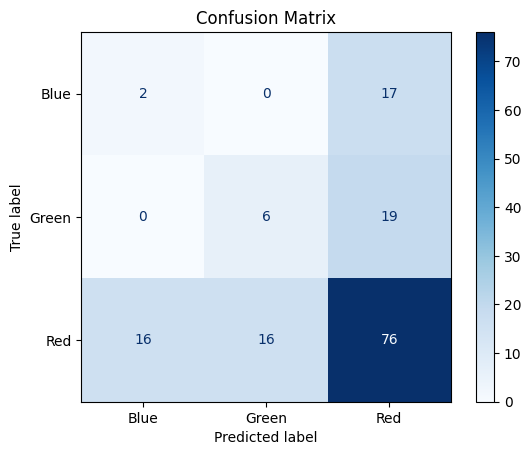

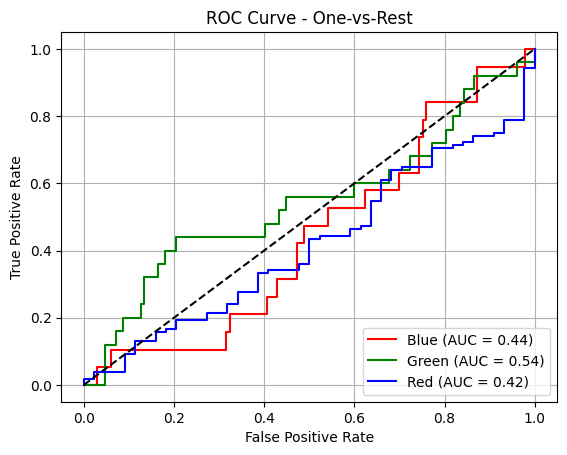

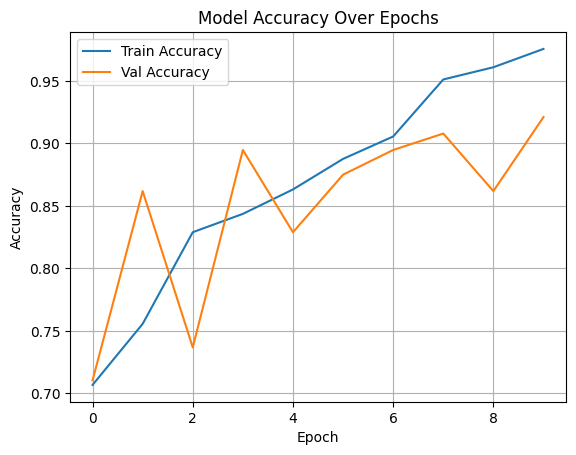

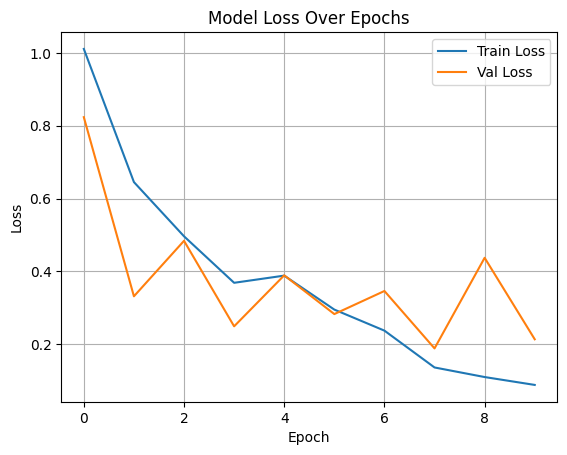

In [ ]:
# 1. Setup
import os
import shutil
from PIL import Image
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

# Create output directories
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# 2. Function to get dominant color
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# 3. Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    try:
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
        print(f"{image_file} -> {dominant_color}")
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# 4. Data Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training')

val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation')

# 5. LeNet-5 Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(img_height, img_width, 3), padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Conv2D(16, kernel_size=(5, 5), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(120, activation='tanh'),
    Dense(84, activation='tanh'),
    Dense(3, activation='softmax')  # Red, Green, Blue
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Train Model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# 7. Save Model
os.makedirs("/content/drive/MyDrive/emotion detection_sorted_final_lenet", exist_ok=True)
model.save("/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet/color_classifier_model.keras")

# 8. Evaluation (Confusion Matrix, ROC, Learning Curve)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get true and predicted labels
val_generator.reset()
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# 8.1 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8.2 ROC Curve (One-vs-Rest)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['red', 'green', 'blue']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve - One-vs-Rest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 8.3 Learning Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install -q -U keras-tuner

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


**Hypertuned lenet**

Trial 30 Complete [00h 05m 03s]
val_accuracy: 0.9539473652839661

Best val_accuracy So Far: 0.9539473652839661
Total elapsed time: 00h 57m 49s

Best Hyperparameters:
Conv1 filters: 16
Conv2 filters: 16
Dense1 units: 120
Dense2 units: 60
Learning rate: 0.0001

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6543 - loss: 0.7931 - val_accuracy: 0.8092 - val_loss: 0.5276
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8205 - loss: 0.4831 - val_accuracy: 0.8618 - val_loss: 0.3980
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8771 - loss: 0.3613 - val_accuracy: 0.8816 - val_loss: 0.3374
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8921 - loss: 0.3001 - val_accuracy: 0.8553 - val_loss: 0.2961
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9291 - loss: 0.2352 - val_accuracy: 0.8947 - val_loss: 0.2562
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9426 - loss: 0.1917 - val_accuracy: 0.9079 - v

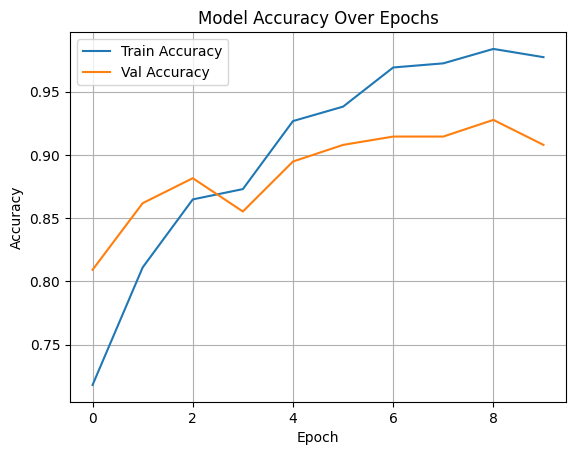

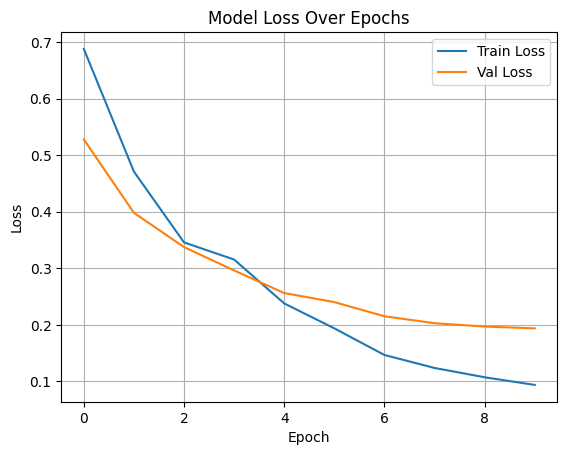

In [ ]:
#!pip install -q -U keras-tuner

import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Get dominant color
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")
img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training'
)
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation'
)
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=4, max_value=16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=8, max_value=32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=60, max_value=180, step=30),
        activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(
        units=hp.Int('dense_2_units', min_value=60, max_value=120, step=20),
        activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model
tuner = kt.Hyperband(
    build_lenet,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='lenet_tuner_dir',
    project_name='lenet_rgb_classification'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"""
Best Hyperparameters:
Conv1 filters: {best_hps.get('conv_1_filters')}
Conv2 filters: {best_hps.get('conv_2_filters')}
Dense1 units: {best_hps.get('dense_1_units')}
Dense2 units: {best_hps.get('dense_2_units')}
Learning rate: {best_hps.get('learning_rate')}
""")
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



**Hypertuned 2D CNN**

Trial 30 Complete [00h 05m 42s]
val_accuracy: 0.8947368264198303

Best val_accuracy So Far: 0.9013158082962036
Total elapsed time: 01h 26m 03s
Best hyperparameters:
Conv1 filters: 48
Conv2 filters: 32
Dense units: 192
Dropout rate: 0.4
Learning rate: 0.0001
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6315 - loss: 0.8696 - val_accuracy: 0.7105 - val_loss: 0.7133
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7222 - loss: 0.6725 - val_accuracy: 0.7368 - val_loss: 0.5738
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8011 - loss: 0.4889 - val_accuracy: 0.8158 - val_loss: 0.4476
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8512 - loss: 0.3872 - val_accuracy: 0.8618 - val_loss: 0.4082
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8627 - loss: 0.3733 - val_accuracy: 0.8092 - val_loss: 0.4553
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8987 - loss: 0.2975 - val_accuracy: 0.8487 - val

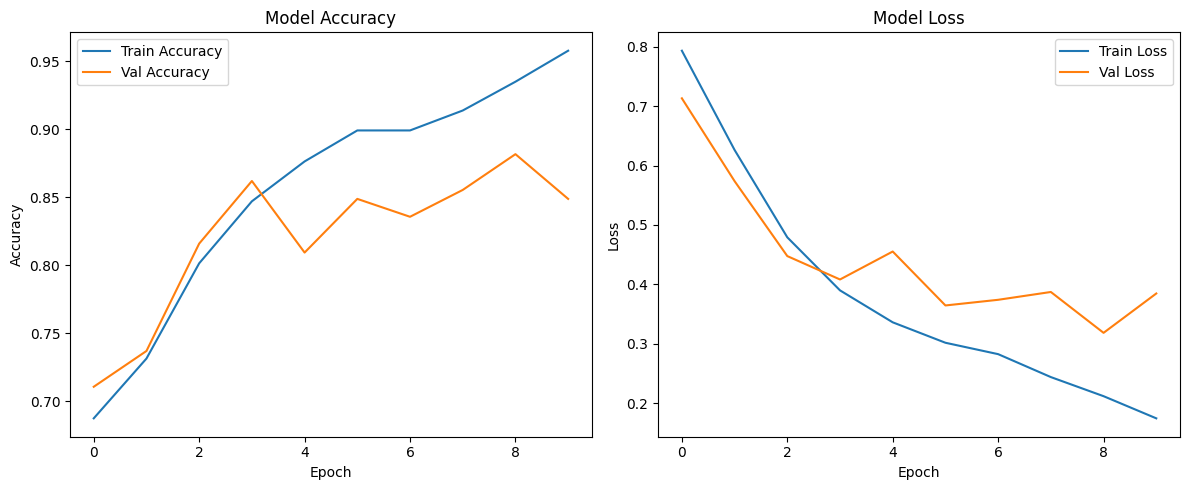

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 598ms/step


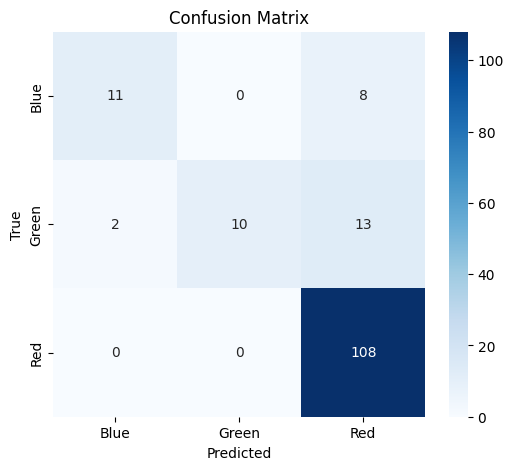

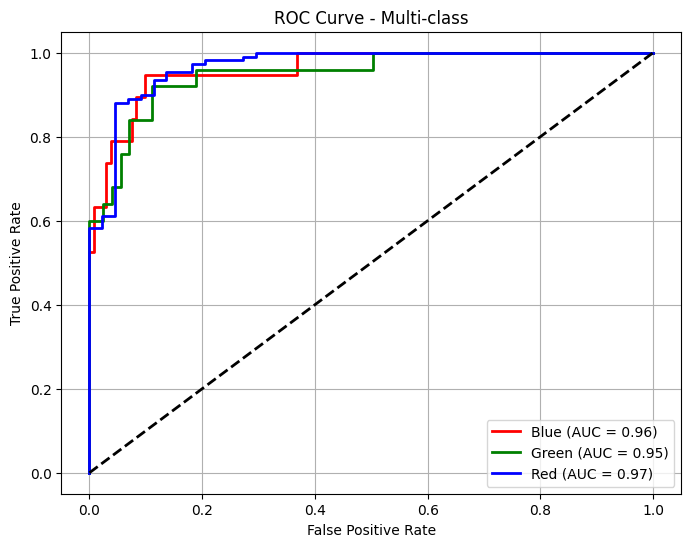

In [ ]:
# Hypertuned CNN for Dominant Color Classification

import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

# Create output folders
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Get dominant color
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# Image dimensions
img_height, img_width = 128, 128
batch_size = 32

# Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training', shuffle=True)
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=False)

# Define Model Builder for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=16, max_value=64, step=16),
        kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

# Tuner Setup
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='cnn_color_tuning',
    project_name='color_classifier'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Perform Tuning
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])

# Retrieve Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(f"Conv1 filters: {best_hps.get('conv_1_filters')}")
print(f"Conv2 filters: {best_hps.get('conv_2_filters')}")
print(f"Dense units: {best_hps.get('dense_units')}")
print(f"Dropout rate: {best_hps.get('dropout_rate')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

# Train the best model
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix
val_generator.reset()
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
class_labels = list(val_generator.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve (multi-class)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve - Multi-class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid()
plt.show()

**Hypertuned Resnet**

Trial 30 Complete [00h 27m 45s]
val_accuracy: 0.75

Best val_accuracy So Far: 0.8421052694320679
Total elapsed time: 05h 11m 57s
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.5939 - loss: 1.9242 - val_accuracy: 0.5395 - val_loss: 0.9425
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 154s 8s/step - accuracy: 0.6910 - loss: 0.6836 - val_accuracy: 0.8092 - val_loss: 0.5707
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 134s 7s/step - accuracy: 0.8019 - loss: 0.4707 - val_accuracy: 0.7961 - val_loss: 0.5123
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.8968 - loss: 0.3177 - val_accuracy: 0.7829 - val_loss: 0.5523
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 151s 8s/step - accuracy: 0.8944 - loss: 0.2563 - val_accuracy: 0.8224 - val_loss: 0.4711
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.9167 - loss: 0.2173 - val_accuracy: 0.8092 - val_loss: 0.4415
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.9721 - loss: 0.1237 - val_accuracy: 0.8289 -

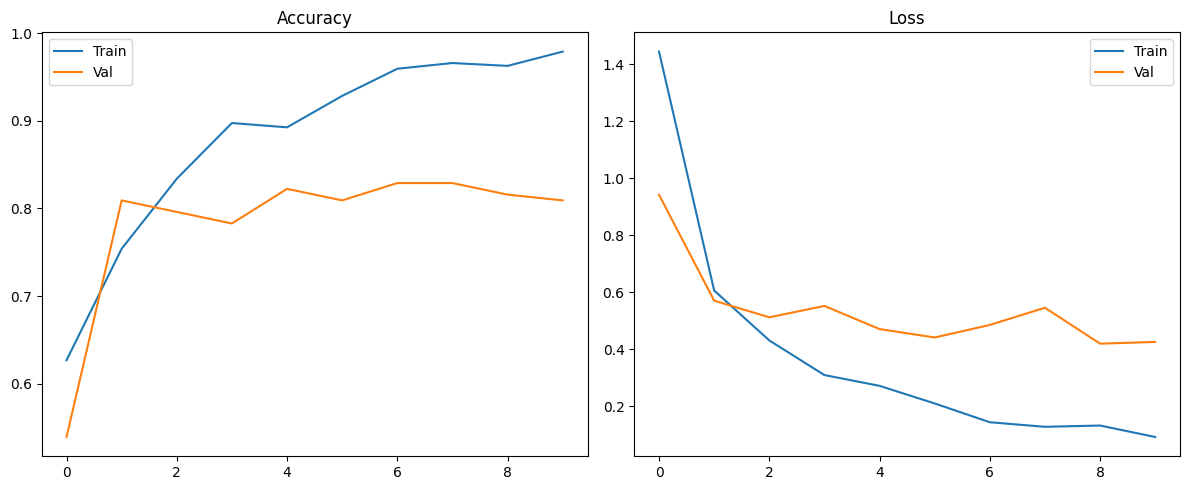

5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step


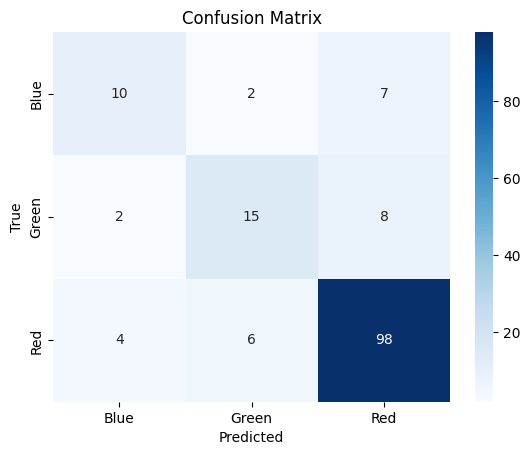

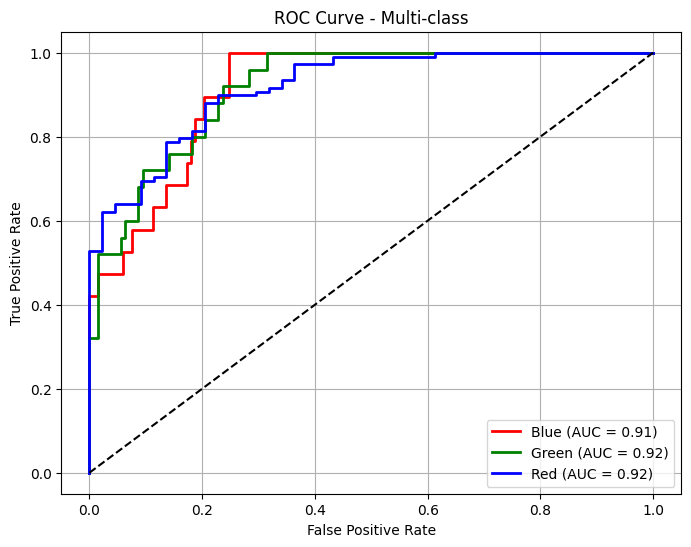

In [ ]:
# Step 1: Install keras-tuner
!pip install keras-tuner --upgrade

# Step 2: Imports
import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from google.colab import drive

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

# Step 3: Mount Google Drive
drive.mount('/content/drive')

# Step 4: Prepare folders
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_resnet_tuned"
os.makedirs(output_base, exist_ok=True)

for color in ["Red", "Green", "Blue"]:
    os.makedirs(os.path.join(output_base, color), exist_ok=True)

# Step 5: Sort by dominant color
def get_dominant_color(pixels):
    r, g, b = np.sum(pixels[:, :, 0]), np.sum(pixels[:, :, 1]), np.sum(pixels[:, :, 2])
    return "Red" if r >= g and r >= b else "Green" if g >= r and g >= b else "Blue"

image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for f in image_files:
    try:
        img = Image.open(os.path.join(folder_path, f)).convert("RGB")
        color = get_dominant_color(np.array(img))
        shutil.copy(os.path.join(folder_path, f), os.path.join(output_base, color, f))
    except Exception as e:
        print(f"Failed on {f}: {e}")

# Step 6: Data pipeline
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical',
    subset='training', shuffle=True)

val_gen = datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical',
    subset='validation', shuffle=False)

# Step 7: Build model with tuner
def build_model(hp):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(hp.Int('dense_units', 64, 256, step=64), activation='relu')(x)
    x = Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1))(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

# Step 8: Hyperparameter tuning
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='resnet_tuner_dir',
    project_name='dominant_color_resnet')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_gen, validation_data=val_gen, epochs=10, callbacks=[stop_early])

# Step 9: Train final model
best_hp = tuner.get_best_hyperparameters(1)[0]
model = tuner.hypermodel.build(best_hp)
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

# Step 10: Save model
model.save("/content/drive/MyDrive/emotion detection_sorted_final_colors_resnet_tuned/color_classifier_resnet_tuned.keras")

# Step 11: Learning Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Step 12: Confusion Matrix
val_gen.reset()
y_true = val_gen.classes
y_probs = model.predict(val_gen)
y_pred = np.argmax(y_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
labels = list(val_gen.class_indices.keys())
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 13: ROC Curve
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
fpr, tpr, roc_auc = {}, {}, {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Multi-class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


**Hypertuned alexnet**

In [ ]:
# 1. Setup
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt

from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_alexnet_tuner"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# 2. Dominant color detection
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# 3. Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        dominant_color = get_dominant_color(np.array(img))
        dest_folder = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest_folder, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# 4. Data Generators
img_height, img_width = 227, 227
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                              batch_size=batch_size, class_mode='categorical',
                                              subset='training', shuffle=True)
val_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                            batch_size=batch_size, class_mode='categorical',
                                            subset='validation', shuffle=False)

# 5. Keras Tuner - AlexNet Builder
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Choice('conv1_filters', [64, 96, 128]),
        kernel_size=hp.Choice('conv1_kernel', [11, 9]),
        strides=(4, 4),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(
        filters=hp.Choice('conv2_filters', [192, 256]),
        kernel_size=5, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(384, 3, activation='relu', padding='same'))
    model.add(Conv2D(384, 3, activation='relu', padding='same'))
    model.add(Conv2D(256, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(hp.Choice('dense_units1', [2048, 3072, 4096]), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', 0.3, 0.7, step=0.1)))
    model.add(Dense(hp.Choice('dense_units2', [2048, 3072, 4096]), activation='relu'))
    model.add(Dropout(hp.Float('dropout2', 0.3, 0.7, step=0.1)))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', [1e-3, 5e-4, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Initialize Hyperband Tuner
tuner = kt.Hyperband(build_model, objective='val_accuracy',
                     max_epochs=15, factor=3, directory='alexnet_tuner', project_name='color_classify')

stop_early = EarlyStopping(monitor='val_loss', patience=3)

# 7. Start Search
tuner.search(train_generator, validation_data=val_generator, epochs=15, callbacks=[stop_early])

# 8. Get Best Model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("/content/drive/MyDrive/emotion detection_sorted_final_colors_alexnet_tuner/best_alexnet_color_classifier.keras")

# 9. Evaluate
val_generator.reset()
Y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

Y_pred_probs = best_model.predict(val_generator)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# ROC Curve
Y_true_bin = label_binarize(Y_true, classes=[0, 1, 2])
n_classes = Y_true_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Trial 11 Complete [00h 06m 31s]
val_accuracy: 0.7105262875556946

Best val_accuracy So Far: 0.8157894611358643
Total elapsed time: 01h 09m 12s

Search: Running Trial #12

Value             |Best Value So Far |Hyperparameter
96                |64                |conv1_filters
9                 |9                 |conv1_kernel
256               |192               |conv2_filters
4096              |3072              |dense_units1
0.3               |0.5               |dropout1
4096              |2048              |dense_units2
0.4               |0.6               |dropout2
0.0001            |0.0001            |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


**Hypertuned VGG16**

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 7.5 MB/s eta 0:00:00


In [ ]:
# 1. Setup
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt
from google.colab import drive

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Mount Drive
drive.mount('/content/drive')

# 2. Directory Setup
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_vgg_tuner"
os.makedirs(os.path.join(output_base, "Red"), exist_ok=True)
os.makedirs(os.path.join(output_base, "Green"), exist_ok=True)
os.makedirs(os.path.join(output_base, "Blue"), exist_ok=True)

# 3. Dominant Color Function
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    return "Red" if r_total > g_total and r_total > b_total else "Green" if g_total > b_total else "Blue"

# 4. Sort Images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        shutil.copy(img_path, os.path.join(output_base, dominant_color, image_file))
    except Exception as e:
        print(f"Error: {image_file}, {e}")

# 5. Image Data Generators
img_height, img_width = 224, 224
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                              batch_size=batch_size, class_mode='categorical',
                                              subset='training', shuffle=True)
val_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                            batch_size=batch_size, class_mode='categorical',
                                            subset='validation', shuffle=False)

# 6. Hypermodel for Tuning
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Option to fine-tune the last few VGG16 layers
    fine_tune_at = hp.Int('fine_tune_at', min_value=15, max_value=18, step=1)
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(hp.Int('dense_units', 256, 1024, step=128), activation='relu')(x)
    x = Dropout(hp.Float('dropout_rate', 0.3, 0.6, step=0.1))(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-4, 5e-5, 1e-5])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 7. Keras Tuner Setup
tuner = kt.Hyperband(build_model, objective='val_accuracy',
                     max_epochs=10, factor=3,
                     directory='vgg16_tuner', project_name='color_classifier_vgg')

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# 8. Search for Best Hyperparameters
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop])

# 9. Get Best Model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("/content/drive/MyDrive/emotion detection_sorted_final_colors_vgg_tuner/best_vgg16_color_model.keras")

# 10. Evaluation
val_generator.reset()
Y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())
Y_pred_probs = best_model.predict(val_generator)
Y_pred_classes = np.argmax(Y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred_classes, target_names=class_labels))

# ROC Curve
Y_true_bin = label_binarize(Y_true, classes=[0, 1, 2])
n_classes = Y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Trial 1 Complete [00h 18m 38s]
val_accuracy: 0.7019867300987244

Best val_accuracy So Far: 0.7019867300987244
Total elapsed time: 00h 18m 38s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
15                |15                |fine_tune_at
896               |896               |dense_units
0.4               |0.5               |dropout_rate
0.0001            |1e-05             |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: 

In [ ]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

# Re-initialize tuner with same params and overwrite=False to resume
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='vgg16_tuner',            # same directory as before
    project_name='color_classifier_vgg', # same project_name as before
    overwrite=False                     # IMPORTANT: Do NOT overwrite, so it resumes
)

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# Resume searching
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop]
)


Trial 30 Complete [00h 17m 30s]
val_accuracy: 0.8289473652839661

Best val_accuracy So Far: 0.9342105388641357
Total elapsed time: 02h 08m 51s


In [ ]:
# Get the best model from tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Save the model to Google Drive
best_model.save("/content/drive/MyDrive/emotion detection_sorted_final_colors_vgg_tuner/best_vgg16_color_model.keras")
print("Best model saved successfully.")


ValueError: A total of 15 objects could not be loaded. Example error message for object <Conv2D name=block1_conv1, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3, 3, 3, 64), Received: value.shape=(5, 5, 3, 28). Target variable: <Variable path=block1_conv1/kernel, shape=(3, 3, 3, 64), dtype=float32, value=[[[[ 4.29470569e-01  1.17273867e-01  3.40129584e-02 ... -1.32241577e-01
    -5.33475243e-02  7.57738389e-03]
   [ 5.50379455e-01  2.08774377e-02  9.88311544e-02 ... -8.48205537e-02
    -5.11389151e-02  3.74943428e-02]
   [ 4.80015397e-01 -1.72696680e-01  3.75577137e-02 ... -1.27135560e-01
    -5.02991639e-02  3.48965675e-02]]

  [[ 3.73466998e-01  1.62062630e-01  1.70863140e-03 ... -1.48207128e-01
    -2.35300660e-01 -6.30356818e-02]
   [ 4.40074533e-01  4.73412387e-02  5.13819456e-02 ... -9.88498852e-02
    -2.96195745e-01 -7.04357103e-02]
   [ 4.08547401e-01 -1.70375049e-01 -4.96297423e-03 ... -1.22360572e-01
    -2.76450396e-01 -3.90796512e-02]]

  [[-6.13601133e-02  1.35693997e-01 -1.15694344e-01 ... -1.40158370e-01
    -3.77666801e-01 -3.00509870e-01]
   [-8.13870355e-02  4.18543853e-02 -1.01763301e-01 ... -9.43124294e-02
    -5.05662560e-01 -3.83694321e-01]
   [-6.51455522e-02 -1.54351532e-01 -1.38038069e-01 ... -1.29404560e-01
    -4.62243795e-01 -3.23985279e-01]]]


 [[[ 2.74769872e-01  1.48350164e-01  1.61559835e-01 ... -1.14316158e-01
     3.65494519e-01  3.39938998e-01]
   [ 3.45739067e-01  3.10493708e-02  2.40750551e-01 ... -6.93419054e-02
     4.37116861e-01  4.13171440e-01]
   [ 3.10477257e-01 -1.87601492e-01  1.66595340e-01 ... -9.88388434e-02
     4.04058546e-01  3.92561197e-01]]

  [[ 3.86807770e-02  2.02298447e-01  1.56414255e-01 ... -5.20089604e-02
     2.57149011e-01  3.71682674e-01]
   [ 4.06322069e-02  6.58102185e-02  2.20311403e-01 ... -3.78979952e-03
     2.69412428e-01  4.09505904e-01]
   [ 5.02023660e-02 -1.77571565e-01  1.51188180e-01 ... -1.40649760e-02
     2.59300828e-01  4.23764467e-01]]

  [[-3.67223352e-01  1.61688417e-01 -8.99365395e-02 ... -1.45945460e-01
    -2.71823555e-01 -2.39718184e-01]
   [-4.53501314e-01  4.62574959e-02 -6.67438358e-02 ... -1.03502415e-01
    -3.45792353e-01 -2.92486250e-01]
   [-4.03383434e-01 -1.74399972e-01 -1.09849639e-01 ... -1.25688612e-01
    -3.14026326e-01 -2.32839763e-01]]]


 [[[-5.74681684e-02  1.29344285e-01  1.29030216e-02 ... -1.41449392e-01
     2.41099641e-01  4.55602147e-02]
   [-5.86349145e-02  3.16787697e-02  7.59588331e-02 ... -1.05017252e-01
     3.39550197e-01  9.86374393e-02]
   [-5.08716851e-02 -1.66002661e-01  1.56279504e-02 ... -1.49742723e-01
     3.06801915e-01  8.82701725e-02]]

  [[-2.62249678e-01  1.71572417e-01  5.44555223e-05 ... -1.22728683e-01
     2.44687453e-01  5.32913655e-02]
   [-3.30669671e-01  5.47101051e-02  4.86797579e-02 ... -8.29023942e-02
     2.95466095e-01  7.44469985e-02]
   [-2.85227507e-01 -1.66666731e-01 -7.96697661e-03 ... -1.09780088e-01
     2.79203743e-01  9.46525261e-02]]

  [[-3.50096762e-01  1.38710454e-01 -1.25339806e-01 ... -1.53092295e-01
    -1.39917329e-01 -2.65075237e-01]
   [-4.85030204e-01  4.23195846e-02 -1.12076312e-01 ... -1.18306056e-01
    -1.67058021e-01 -3.22241962e-01]
   [-4.18516338e-01 -1.57048807e-01 -1.49133086e-01 ... -1.56839803e-01
    -1.42874300e-01 -2.69694626e-01]]]]>

List of objects that could not be loaded:
[<Conv2D name=block1_conv1, built=True>, <Conv2D name=block1_conv2, built=True>, <Conv2D name=block2_conv1, built=True>, <Conv2D name=block2_conv2, built=True>, <Conv2D name=block3_conv1, built=True>, <Conv2D name=block3_conv2, built=True>, <Conv2D name=block3_conv3, built=True>, <Conv2D name=block4_conv1, built=True>, <Conv2D name=block4_conv2, built=True>, <Conv2D name=block4_conv3, built=True>, <Conv2D name=block5_conv1, built=True>, <Conv2D name=block5_conv2, built=True>, <Conv2D name=block5_conv3, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>]

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Make sure dimensions match your tuning model
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet'

**tuned lenet**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 614 images belonging to 3 classes.
Found 152 images belonging to 3 classes.
Reloading Tuner from lenet_tuner_dir/lenet_rgb_classification/tuner0.json

Best Hyperparameters:
Conv1 filters: 16
Conv2 filters: 16
Dense1 units: 120
Dense2 units: 60
Learning rate: 0.0001



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.6030 - loss: 0.8685 - val_accuracy: 0.8224 - val_loss: 0.5061
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8230 - loss: 0.4794 - val_accuracy: 0.8882 - val_loss: 0.3729
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8955 - loss: 0.3111 - val_accuracy: 0.8421 - val_loss: 0.3564
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9349 - loss: 0.2769 - val_accuracy: 0.9605 - val_loss: 0.2898
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9472 - loss: 0.2139 - val_accuracy: 0.9013 - val_loss: 0.2459
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9500 - loss: 0.1926 - val_accuracy: 0.9539 - val_loss: 0.2378
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9715 - loss: 0.1589 - val_accuracy: 0.8947 - val_loss: 0.2681
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9820 - loss: 0.1328 - val_accuracy: 0.9013 - val_loss:

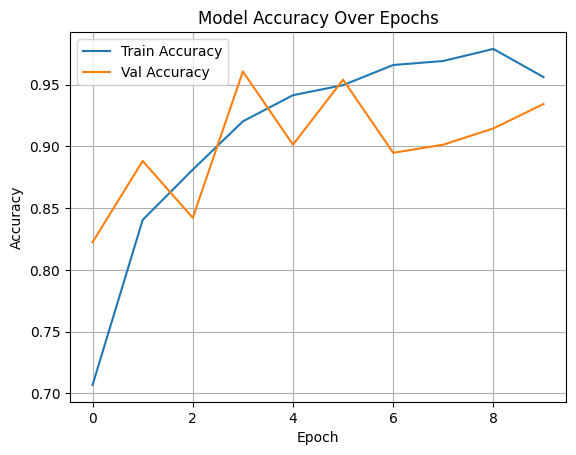

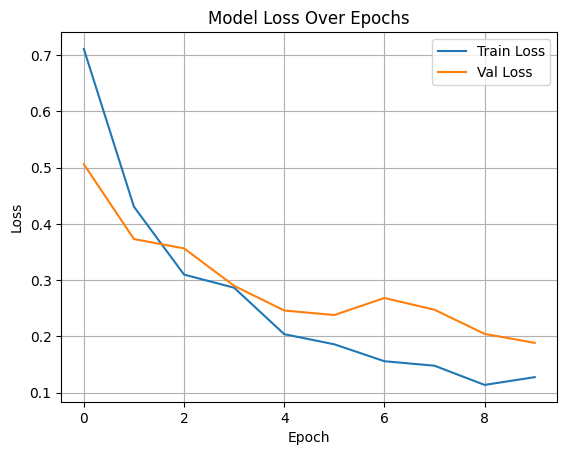

In [ ]:
#!pip install -q -U keras-tuner

import os
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from google.colab import drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_lenet"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Get dominant color
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        pixels = np.array(img)
        dominant_color = get_dominant_color(pixels)
        dest = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")
img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='training'
)
val_generator = train_datagen.flow_from_directory(
    output_base, target_size=(img_height, img_width),
    batch_size=batch_size, class_mode='categorical', subset='validation'
)
def build_lenet(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filters', min_value=4, max_value=16, step=4),
        kernel_size=(5, 5), activation=hp.Choice('conv_1_activation', ['tanh', 'relu']),
        padding='same', input_shape=(img_height, img_width, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Conv2D(
        filters=hp.Int('conv_2_filters', min_value=8, max_value=32, step=8),
        kernel_size=(5, 5), activation=hp.Choice('conv_2_activation', ['tanh', 'relu']),
        padding='valid'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2))

    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_1_units', min_value=60, max_value=180, step=30),
        activation=hp.Choice('dense_1_activation', ['tanh', 'relu'])))
    model.add(Dense(
        units=hp.Int('dense_2_units', min_value=60, max_value=120, step=20),
        activation=hp.Choice('dense_2_activation', ['tanh', 'relu'])))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model
tuner = kt.Hyperband(
    build_lenet,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='lenet_tuner_dir',
    project_name='lenet_rgb_classification'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])
best_hps = tuner.get_best_hyperparameters(1)[0]

print(f"""
Best Hyperparameters:
Conv1 filters: {best_hps.get('conv_1_filters')}
Conv2 filters: {best_hps.get('conv_2_filters')}
Dense1 units: {best_hps.get('dense_1_units')}
Dense2 units: {best_hps.get('dense_2_units')}
Learning rate: {best_hps.get('learning_rate')}
""")
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# 1. Setup
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt

from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Check GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_alexnet_tuner"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

for folder in [red_folder, green_folder, blue_folder]:
    os.makedirs(folder, exist_ok=True)

# 2. Optimized Dominant Color Detection
def get_dominant_color(img_array):
    color_sums = np.sum(img_array, axis=(0, 1))
    return ["Red", "Green", "Blue"][np.argmax(color_sums)]

# 3. Sort Images (resized for faster processing)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB").resize((64, 64))  # Smaller size for faster processing
        dominant_color = get_dominant_color(np.array(img))
        shutil.copy(img_path, os.path.join(output_base, dominant_color, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# 4. Data Generators
img_height, img_width = 150, 150  # Reduced for faster training
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                              batch_size=batch_size, class_mode='categorical',
                                              subset='training', shuffle=True)
val_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                            batch_size=batch_size, class_mode='categorical',
                                            subset='validation', shuffle=False)

# 5. Keras Tuner - AlexNet Builder (with smaller search space)
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Choice('conv1_filters', [64, 96]),
        kernel_size=hp.Choice('conv1_kernel', [11, 9]),
        strides=(4, 4),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(
        filters=hp.Choice('conv2_filters', [192, 256]),
        kernel_size=5, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(384, 3, activation='relu', padding='same'))
    model.add(Conv2D(384, 3, activation='relu', padding='same'))
    model.add(Conv2D(256, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(hp.Choice('dense_units1', [2048, 3072]), activation='relu'))
    model.add(Dropout(hp.Choice('dropout1', [0.4, 0.5, 0.6])))
    model.add(Dense(hp.Choice('dense_units2', [2048, 3072]), activation='relu'))
    model.add(Dropout(hp.Choice('dropout2', [0.4, 0.5, 0.6])))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', [1e-3, 5e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Initialize Hyperband Tuner
tuner = kt.Hyperband(build_model, objective='val_accuracy',
                     max_epochs=15, factor=3, directory='alexnet_tuner', project_name='color_classify')

stop_early = EarlyStopping(monitor='val_loss', patience=3)

# 7. Start Search
tuner.search(train_generator,
             steps_per_epoch=train_generator.samples // batch_size,
             validation_data=val_generator,
             validation_steps=val_generator.samples // batch_size,
             epochs=15, callbacks=[stop_early])

# 8. Get Best Model
best_model = tuner.get_best_models(num_models=1)[0]
model_save_path = os.path.join(output_base, "best_alexnet_color_classifier.keras")
best_model.save(model_save_path)

# 9. Evaluate
Y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

Y_pred_probs = best_model.predict(val_generator, verbose=1)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# ROC Curve (if < 5000 samples)
if len(Y_true) < 5000:
    Y_true_bin = label_binarize(Y_true, classes=[0, 1, 2])
    n_classes = Y_true_bin.shape[1]
    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Multi-class ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


Num GPUs Available:  0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, shutil
from PIL import Image
import numpy as np
from tqdm import tqdm

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_vgg_tuner"

# Create folders
for color in ["Red", "Green", "Blue"]:
    os.makedirs(os.path.join(output_base, color), exist_ok=True)

# Optimized color detection
def get_dominant_color(img):
    img = img.resize((50, 50))  # downsample
    pixels = np.array(img)
    r, g, b = np.sum(pixels[:, :, 0]), np.sum(pixels[:, :, 1]), np.sum(pixels[:, :, 2])
    return "Red" if r > g and r > b else "Green" if g > b else "Blue"

# Process images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in tqdm(image_files, desc="Sorting images"):
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        dominant_color = get_dominant_color(img)
        shutil.copyfile(img_path, os.path.join(output_base, dominant_color, image_file))
    except Exception as e:
        print(f"Error: {image_file}, {e}")


Sorting images: 100%|██████████| 766/766 [00:31<00:00, 24.51it/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(output_base,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True)

val_generator = datagen.flow_from_directory(output_base,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False)


Found 616 images belonging to 3 classes.
Found 151 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    fine_tune_at = hp.Int('fine_tune_at', 16, 18)
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(hp.Choice('dense_units', [512, 768]), activation='relu')(x)
    x = Dropout(hp.Choice('dropout_rate', [0.4, 0.5]))(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-4, 5e-5])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
# file ipython-input-5-3540400537 (define build_model)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
import tensorflow as tf # Import tensorflow for callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model # This import might not be needed unless loading a previously saved model
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ensure img_height, img_width, and output_base are defined before use
# If they were defined in a previous cell, you don't need to redefine them here,
# but ensure that cell was executed first. Or, define them explicitly here:
img_height, img_width = 224, 224
#output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_vgg_tuner" # Assuming this is defined elsewhere or above

# === DATA GENERATOR SETUP (Added this section) ===
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    output_base,
    target_size=(img_height, img_width),
    batch_size=batch_size, # Ensure batch_size is defined, likely in a previous cell
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    output_base,
    target_size=(img_height, img_width),
    batch_size=batch_size, # Ensure batch_size is defined
    class_mode='categorical',
    subset='validation',
    shuffle=False
)
# === END DATA GENERATOR SETUP ===


def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Option to fine-tune the last few VGG16 layers
    # Adjust min_value and max_value based on your preference for tuning layers
    fine_tune_at = hp.Int('fine_tune_at', min_value=15, max_value=18, step=1) # Corrected range for VGG16 layers
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True


    x = GlobalAveragePooling2D()(base_model.output)
    # Adjust dense_units choices based on tuner search range
    x = Dense(hp.Choice('dense_units', [256, 512, 768, 1024]), activation='relu')(x) # Added more options matching original code
    # Adjust dropout_rate choices based on tuner search range
    x = Dropout(hp.Choice('dropout_rate', [0.3, 0.4, 0.5, 0.6]))(x) # Added more options matching original code
    output = Dense(3, activation='softmax')(x) # Assuming 3 classes (Red, Green, Blue)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(
        # Adjust learning_rate choices based on tuner search range
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-4, 5e-5, 1e-5])), # Added more options matching original code
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


# file ipython-input-2-3540400537 (tuner initialization and search)

# === SETUP ===
TUNER_DIR = 'vgg16_tuner'
PROJECT_NAME = 'color_classifier_vgg'
# Ensure the directory exists before setting checkpoint path
CHECKPOINT_DIR = '/content/drive/MyDrive/emotion detection_sorted_final_colors_vgg_tuner/checkpoints'
CHECKPOINT_PATH = os.path.join(CHECKPOINT_DIR, 'best_model.keras')
FINAL_MODEL_PATH = '/content/drive/MyDrive/emotion detection_sorted_final_colors_vgg_tuner/best_vgg16_color_model.keras'

# Create the checkpoint directory
os.makedirs(CHECKPOINT_DIR, exist_ok=True)


# === CALLBACKS ===
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
checkpoint_cb = ModelCheckpoint(filepath=CHECKPOINT_PATH, monitor='val_loss', save_best_only=True, verbose=1)

# === TUNER ===
# Ensure build_model is defined before this
tuner = kt.Hyperband(
    build_model, # build_model is now defined above
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory=TUNER_DIR,
    project_name=PROJECT_NAME,
    overwrite=False # Set overwrite to False if you want to resume a previous search
)

# Load previous state if it exists (Optional, only if resuming)
# tuner.reload() # Uncomment if you are resuming a previous search


# === HYPERPARAMETER SEARCH ===
# train_generator and val_generator are now defined within this cell or a preceding one.
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=10, # Or more if needed, depending on max_epochs in Tuner
    callbacks=[early_stop, checkpoint_cb]
)

# === SAVE BEST MODEL ===
# It's safer to load the best model from the checkpoint path after tuning finishes
# in case the tuning was interrupted or the last epoch wasn't the best.
try:
    best_model = load_model(CHECKPOINT_PATH)
    print(f"Loaded best model from checkpoint: {CHECKPOINT_PATH}")
except Exception as e:
    print(f"Could not load model from checkpoint: {e}. Getting best model from tuner.")
    # If loading from checkpoint fails, get the best model directly from the tuner
    best_model = tuner.get_best_models(num_models=1)[0]
    print("Retrieved best model directly from tuner.")

# Save the best model to the final path
best_model.save(FINAL_MODEL_PATH)
print(f"Best model saved to: {FINAL_MODEL_PATH}")


# === EVALUATION ===
def evaluate_model(model, generator):
    print("\nEvaluating model...")

    # Get true labels and class names
    generator.reset()
    Y_true = generator.classes
    class_labels = list(generator.class_indices.keys())

    # Predict probabilities and classes
    # Use verbose=1 to see progress during prediction
    Y_pred_probs = model.predict(generator, verbose=1)
    Y_pred_classes = np.argmax(Y_pred_probs, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_true, Y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(Y_true, Y_pred_classes, target_names=class_labels))

    # ROC Curve
    # Ensure classes cover all labels present in y_true
    unique_classes = np.unique(Y_true)
    y_true_bin = label_binarize(Y_true, classes=unique_classes) # Use unique_classes to handle cases where some classes might be missing in validation set
    n_classes = y_true_bin.shape[1]

    # Check if y_pred_probs has the correct number of columns
    if Y_pred_probs.shape[1] != n_classes:
         print(f"Warning: Number of columns in predictions ({Y_pred_probs.shape[1]}) does not match number of unique classes ({n_classes}). ROC curve skipped.")
         # Optionally, skip ROC plot or handle appropriately
         return

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        # Use y_true_bin and Y_pred_probs for the correct class index
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'{class_labels[unique_classes[i]]} (AUC = {roc_auc[i]:.2f})') # Map index back to label
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Run evaluation
# Ensure best_model is defined (either from tuner.get_best_models or load_model)
evaluate_model(best_model, val_generator)

NameError: name 'output_base' is not defined

In [ ]:
# This alternative works with many Keras Tuner versions:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
metrics = best_trial.metrics.metrics

# Extract val_accuracy and accuracy
val_acc = metrics['val_accuracy'].values
acc = metrics['accuracy'].values
epochs = range(1, len(acc) + 1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'tuner' is not defined

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.7 MB/s eta 0:00:00


Trial 30 Complete [00h 01m 31s]
val_accuracy: 0.8355262875556946

Best val_accuracy So Far: 0.8355262875556946
Total elapsed time: 00h 24m 32s
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step


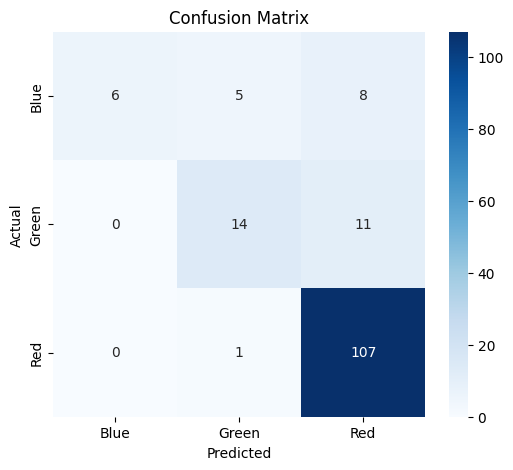

Classification Report:
              precision    recall  f1-score   support

        Blue       1.00      0.32      0.48        19
       Green       0.70      0.56      0.62        25
         Red       0.85      0.99      0.91       108

    accuracy                           0.84       152
   macro avg       0.85      0.62      0.67       152
weighted avg       0.84      0.84      0.81       152



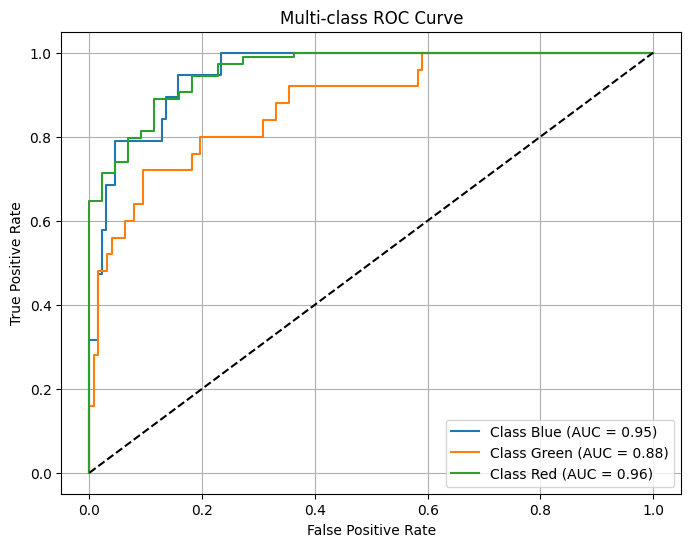

In [ ]:
# 1. Setup
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner as kt

from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Mount Google Drive
drive.mount('/content/drive')

# Paths
folder_path = "/content/drive/MyDrive/emotion detection/"
output_base = "/content/drive/MyDrive/emotion detection_sorted_final_colors_alexnet_tuner"
red_folder = os.path.join(output_base, "Red")
green_folder = os.path.join(output_base, "Green")
blue_folder = os.path.join(output_base, "Blue")

os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# 2. Dominant color detection
def get_dominant_color(pixels):
    r_total = np.sum(pixels[:, :, 0])
    g_total = np.sum(pixels[:, :, 1])
    b_total = np.sum(pixels[:, :, 2])
    max_color = max(r_total, g_total, b_total)
    return "Red" if max_color == r_total else "Green" if max_color == g_total else "Blue"

# 3. Sort images
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
for image_file in image_files:
    try:
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path).convert("RGB")
        dominant_color = get_dominant_color(np.array(img))
        dest_folder = {"Red": red_folder, "Green": green_folder, "Blue": blue_folder}[dominant_color]
        shutil.copy(img_path, os.path.join(dest_folder, image_file))
    except Exception as e:
        print(f"Error with {image_file}: {e}")

# 4. Data Generators
img_height, img_width = 227, 227
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                              batch_size=batch_size, class_mode='categorical',
                                              subset='training', shuffle=True)
val_generator = datagen.flow_from_directory(output_base, target_size=(img_height, img_width),
                                            batch_size=batch_size, class_mode='categorical',
                                            subset='validation', shuffle=False)

# 5. Keras Tuner - AlexNet Builder
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(
        filters=hp.Choice('conv1_filters', [64, 96, 128]),
        kernel_size=hp.Choice('conv1_kernel', [11, 9]),
        strides=(4, 4),
        activation='relu',
        input_shape=(img_height, img_width, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(
        filters=hp.Choice('conv2_filters', [192, 256]),
        kernel_size=5, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Conv2D(384, 3, activation='relu', padding='same'))
    model.add(Conv2D(384, 3, activation='relu', padding='same'))
    model.add(Conv2D(256, 3, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(hp.Choice('dense_units1', [2048, 3072, 4096]), activation='relu'))
    model.add(Dropout(hp.Float('dropout1', 0.3, 0.7, step=0.1)))
    model.add(Dense(hp.Choice('dense_units2', [2048, 3072, 4096]), activation='relu'))
    model.add(Dropout(hp.Float('dropout2', 0.3, 0.7, step=0.1)))

    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('lr', [1e-3, 5e-4, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Initialize Hyperband Tuner
tuner = kt.Hyperband(build_model, objective='val_accuracy',
                     max_epochs=15, factor=3, directory='alexnet_tuner', project_name='color_classify')

stop_early = EarlyStopping(monitor='val_loss', patience=3)

# 7. Start Search
tuner.search(train_generator, validation_data=val_generator, epochs=15, callbacks=[stop_early])

# 8. Get Best Model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("/content/drive/MyDrive/emotion detection_sorted_final_colors_alexnet_tuner/best_alexnet_color_classifier.keras")

# 9. Evaluate
val_generator.reset()
Y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

Y_pred_probs = best_model.predict(val_generator)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# ROC Curve
Y_true_bin = label_binarize(Y_true, classes=[0, 1, 2])
n_classes = Y_true_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 672ms/step - accuracy: 0.8245 - loss: 0.4768 - val_accuracy: 0.7632 - val_loss: 0.9361
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.8216 - loss: 0.4813 - val_accuracy: 0.7895 - val_loss: 0.8289
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 362ms/step - accuracy: 0.8914 - loss: 0.3066 - val_accuracy: 0.3092 - val_loss: 1.0661
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 366ms/step - accuracy: 0.8736 - loss: 0.3409 - val_accuracy: 0.4539 - val_loss: 0.8792
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - accuracy: 0.9110 - loss: 0.2576 - val_accuracy: 0.5921 - val_loss: 0.7118
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.8956 - loss: 0.2632 - val_accuracy: 0.3684 - val_loss: 1.1541
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 374ms/step - accuracy: 0.9394 - loss: 0.1785 - val_accuracy: 0.3750 - val_loss: 1.0005
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - accuracy: 0.8911 - loss: 0.3447 - val_accuracy: 0

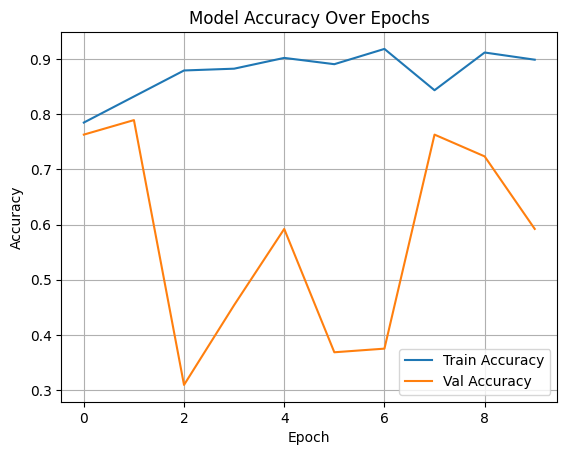

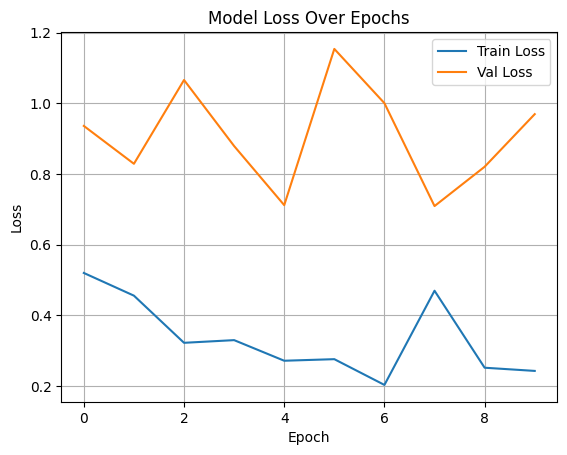

In [ ]:

history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Trial 30 Complete [00h 01m 24s]
val_accuracy: 0.7105262875556946

Best val_accuracy So Far: 0.7434210777282715
Total elapsed time: 00h 19m 42s
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 444ms/step


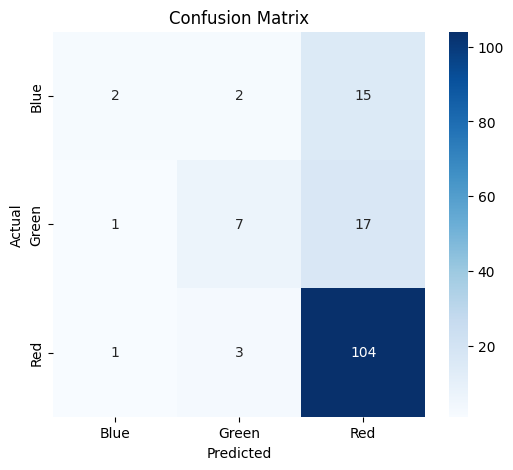

Classification Report:
              precision    recall  f1-score   support

        Blue       0.50      0.11      0.17        19
       Green       0.58      0.28      0.38        25
         Red       0.76      0.96      0.85       108

    accuracy                           0.74       152
   macro avg       0.62      0.45      0.47       152
weighted avg       0.70      0.74      0.69       152



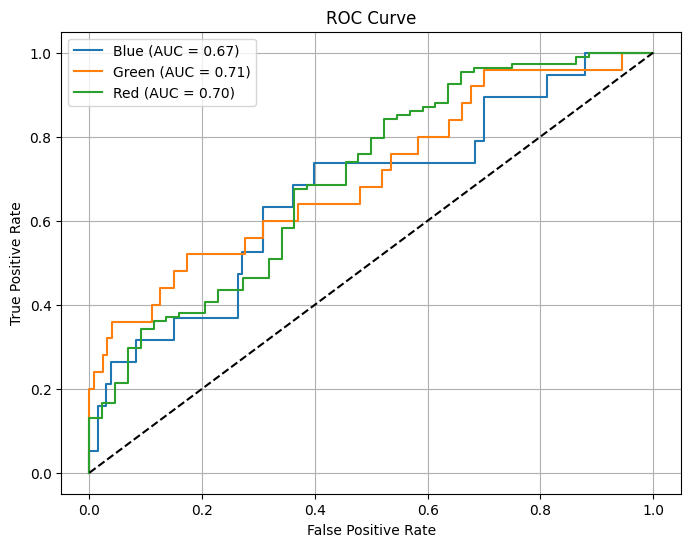

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 578ms/step - accuracy: 0.8369 - loss: 0.3918 - val_accuracy: 0.7368 - val_loss: 0.7792
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 367ms/step - accuracy: 0.8928 - loss: 0.3060 - val_accuracy: 0.7303 - val_loss: 0.8253
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - accuracy: 0.9018 - loss: 0.3233 - val_accuracy: 0.7500 - val_loss: 0.8246
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step - accuracy: 0.9251 - loss: 0.2467 - val_accuracy: 0.7368 - val_loss: 0.8604
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.9571 - loss: 0.1866 - val_accuracy: 0.7303 - val_loss: 0.9284
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.9651 - loss: 0.1468 - val_accuracy: 0.7237 - val_loss: 0.9844
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.9513 - loss: 0.1406 - val_accuracy: 0.7434 - val_loss: 1.0575
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 365ms/step - accuracy: 0.9562 - loss: 0.1357 - val_accuracy: 0

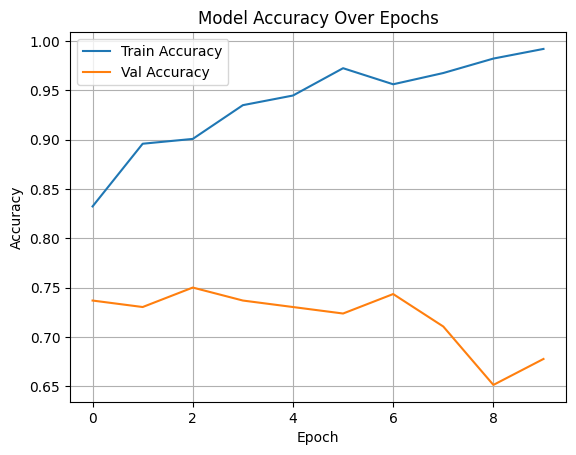

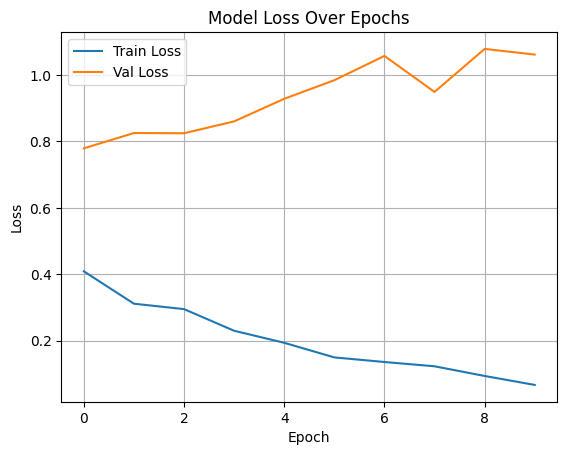

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
# 6. Hypermodel for Tuning
def build_model(hp):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Option to fine-tune the last few VGG16 layers
    fine_tune_at = hp.Int('fine_tune_at', min_value=15, max_value=18, step=1)
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(hp.Int('dense_units', 256, 1024, step=128), activation='relu')(x)
    x = Dropout(hp.Float('dropout_rate', 0.3, 0.6, step=0.1))(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-4, 5e-5, 1e-5])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 7. Keras Tuner Setup
tuner = kt.Hyperband(build_model, objective='val_accuracy',
                     max_epochs=10, factor=3,
                     directory='vgg16_tuner', project_name='color_classifier_vgg')

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# 8. Search for Best Hyperparameters
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[early_stop])

# 9. Get Best Model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("/content/drive/MyDrive/best_vgg16_color_model.keras")

# 10. Evaluation
val_generator.reset()
Y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())
Y_pred_probs = best_model.predict(val_generator)
Y_pred_classes = np.argmax(Y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(Y_true, Y_pred_classes, target_names=class_labels))

# ROC Curve
Y_true_bin = label_binarize(Y_true, classes=[0, 1, 2])
n_classes = Y_true_bin.shape[1]

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


history = best_model.fit(train_generator, validation_data=val_generator, epochs=10)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()